<a href="https://colab.research.google.com/github/180030814-GnaneshwarReddy/GnaneswaraReddy_INFO5731_Fall2024/blob/main/Palem_Gnaneswara_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

dataset_path = '/content/IMDB_Reviews_Annoted.csv'
review_data = pd.read_csv(dataset_path)

review_texts = review_data['clean_text'].dropna()

text_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
review_matrix = text_vectorizer.fit_transform(review_texts)

vectorized_features = text_vectorizer.get_feature_names_out()
print("Features (text representation) used for topic modeling:")
print(vectorized_features)

topic_model = LatentDirichletAllocation(n_components=10, random_state=42)
topic_model.fit(review_matrix)

def extract_top_keywords(model, feature_names, top_n_words):
    topic_list = []
    topic_summary = []
    for idx, topic in enumerate(model.components_):
        top_keywords = [feature_names[i] for i in topic.argsort()[:-top_n_words - 1:-1]]
        topic_list.append(f"Topic {idx + 1}: {', '.join(top_keywords)}")
        topic_summary.append(f"Topic {idx + 1} describes themes around: {', '.join(top_keywords[:5])}")
    return topic_list, topic_summary

topics, topic_summaries = extract_top_keywords(topic_model, vectorized_features, 10)

print("\nTop 10 clusters for topic modeling:")
for topic in topics:
    print(topic)

print("\nSummarize and describe the topic for each cluster:")
for summary in topic_summaries:
    print(summary)


Features (text representation) used for topic modeling:
['aback' 'abandoned' 'abandoning' ... 'zimmer' 'zimmerman' 'zimmers']

Top 10 clusters for topic modeling:
Topic 1: film, dune, villeneuve, best, denis, story, movie, screen, films, chalamet
Topic 2: dune, film, cinematic, narrative, depth, performances, epic, experience, herberts, arrakis
Topic 3: movie, dune, film, book, characters, best, like, just, time, denis
Topic 4: movie, like, just, story, good, great, film, time, scenes, really
Topic 5: movie, dune, just, story, really, time, good, like, movies, watch
Topic 6: film, dune, movie, just, story, book, like, people, left, time
Topic 7: movie, dune, like, just, movies, im, cinema, film, time, scifi
Topic 8: movie, story, paul, book, scene, just, way, chani, main, denis
Topic 9: paul, fremen, chani, movie, book, jessica, film, just, pauls, emperor
Topic 10: movie, like, just, film, story, movies, scene, films, character, truly

Summarize and describe the topic for each cluster:

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [2]:
# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

dataset_path = '/content/IMDB_Reviews_Annoted.csv'
review_dataset = pd.read_csv(dataset_path)

feature_text = review_dataset['clean_text']
target_sentiment = review_dataset['sentiment']

text_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
feature_vectors = text_vectorizer.fit_transform(feature_text.dropna())

X_train, X_test, y_train, y_test = train_test_split(feature_vectors, target_sentiment, test_size=0.2, random_state=42, stratify=target_sentiment)

logistic_model = LogisticRegression(max_iter=500, random_state=42)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)

logistic_cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')
forest_cv_scores = cross_val_score(forest_model, X_train, y_train, cv=5, scoring='accuracy')

logistic_metrics = {
    "Accuracy": accuracy_score(y_test, logistic_predictions),
    "Precision": precision_score(y_test, logistic_predictions, pos_label='positive', zero_division=1),
    "Recall": recall_score(y_test, logistic_predictions, pos_label='positive', zero_division=1),
    "F1 Score": f1_score(y_test, logistic_predictions, pos_label='positive', zero_division=1)
}

forest_metrics = {
    "Accuracy": accuracy_score(y_test, forest_predictions),
    "Precision": precision_score(y_test, forest_predictions, pos_label='positive', zero_division=1),
    "Recall": recall_score(y_test, forest_predictions, pos_label='positive', zero_division=1),
    "F1 Score": f1_score(y_test, forest_predictions, pos_label='positive', zero_division=1)
}

logistic_classification_report = classification_report(y_test, logistic_predictions, zero_division=1)
forest_classification_report = classification_report(y_test, forest_predictions, zero_division=1)

print("Logistic Regression Metrics:")
print(logistic_metrics)
print("\nRandom Forest Metrics:")
print(forest_metrics)

print("\nLogistic Regression Classification Report:")
print(logistic_classification_report)

print("\nRandom Forest Classification Report:")
print(forest_classification_report)

print("\nCross-validation Mean Accuracy:")
print(f"Logistic Regression: {logistic_cv_scores.mean():.4f}")
print(f"Random Forest: {forest_cv_scores.mean():.4f}")





Logistic Regression Metrics:
{'Accuracy': 0.93, 'Precision': 0.9296482412060302, 'Recall': 1.0, 'F1 Score': 0.9635416666666666}

Random Forest Metrics:
{'Accuracy': 0.925, 'Precision': 0.925, 'Recall': 1.0, 'F1 Score': 0.961038961038961}

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.07      0.12        15
    positive       0.93      1.00      0.96       185

    accuracy                           0.93       200
   macro avg       0.96      0.53      0.54       200
weighted avg       0.93      0.93      0.90       200


Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.00      0.00        15
    positive       0.93      1.00      0.96       185

    accuracy                           0.93       200
   macro avg       0.96      0.50      0.48       200
weighted avg       0.93      0.93      0.89       200


Cross-validation Mean Acc

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

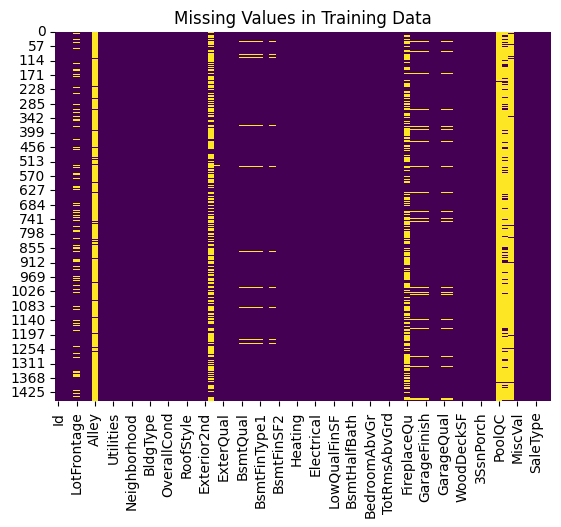

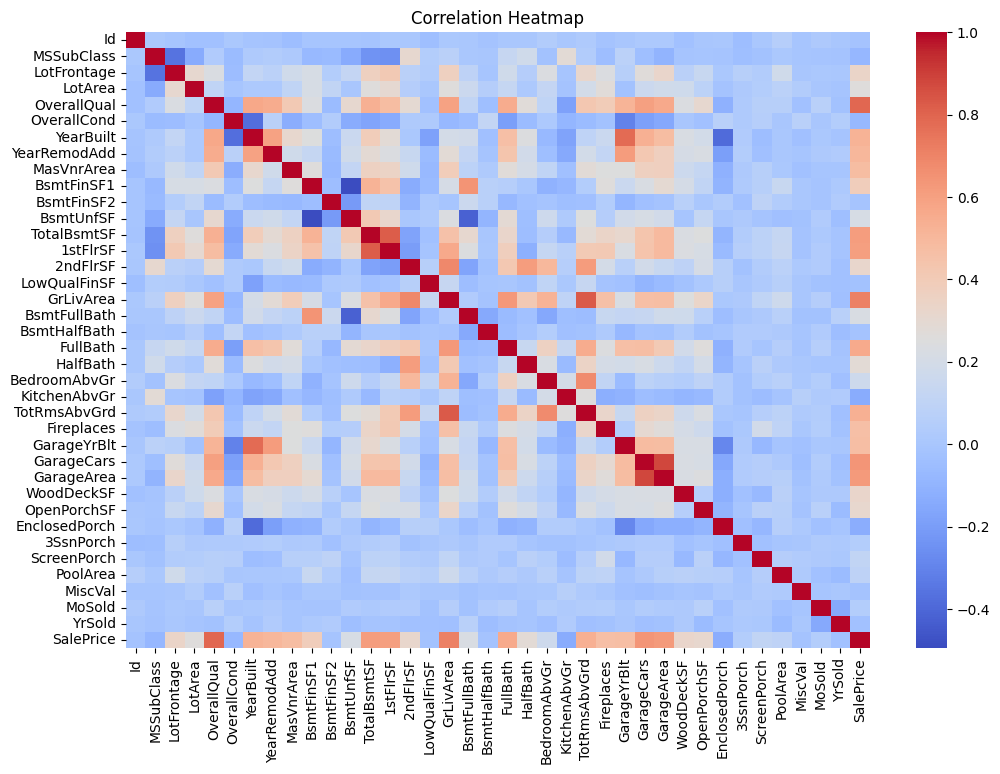

Top Features Correlated with SalePrice:
Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')
Linear Regression Metrics:
{'MSE': 1565677639.1441379, 'RMSE': 39568.644646287015, 'R2 Score': 0.7958786110456304}

Random Forest Regressor Metrics:
{'MSE': 876330673.3940114, 'RMSE': 29602.88285613432, 'R2 Score': 0.8857505339769141}


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

train_file_path = "/content/train.csv"
test_file_path = "/content/test.csv"
training_data = pd.read_csv(train_file_path)
testing_data = pd.read_csv(test_file_path)

print("Training Data Info:")
print(training_data.info())
print("\nTesting Data Info:")
print(testing_data.info())

print("\nMissing Values in Training Data:")
missing_values_training = training_data.isnull().sum()
print(missing_values_training[missing_values_training > 0])

sns.heatmap(training_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Training Data")
plt.show()

missing_percent = (training_data.isnull().sum() / len(training_data)) * 100
columns_to_drop = missing_percent[missing_percent > 30].index
training_data.drop(columns=columns_to_drop, inplace=True)
testing_data.drop(columns=columns_to_drop, inplace=True)

numerical_imputer = SimpleImputer(strategy="mean")
categorical_imputer = SimpleImputer(strategy="most_frequent")

for column in training_data.columns:
    if training_data[column].dtype in ["int64", "float64"]:
        training_data[column] = numerical_imputer.fit_transform(training_data[[column]])
        if column in testing_data.columns:
            testing_data[column] = numerical_imputer.transform(testing_data[[column]])
    elif training_data[column].dtype == "object":
        training_data[column] = categorical_imputer.fit_transform(training_data[[column]]).ravel()
        if column in testing_data.columns:
            testing_data[column] = categorical_imputer.transform(testing_data[[column]]).ravel()

numerical_columns = training_data.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(training_data[numerical_columns].corr(), cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

features = training_data.drop("SalePrice", axis=1)
target = training_data["SalePrice"]
features_train, features_val, target_train, target_val = train_test_split(features, target, test_size=0.2, random_state=42)

correlation_matrix = training_data[numerical_columns].corr()
most_correlated_features = correlation_matrix["SalePrice"].sort_values(ascending=False).head(10).index
print("Top Features Correlated with SalePrice:")
print(most_correlated_features)

features_train_selected = features_train[most_correlated_features.intersection(features_train.select_dtypes(include=['number']).columns)]
features_val_selected = features_val[most_correlated_features.intersection(features_val.select_dtypes(include=['number']).columns)]

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

linear_model = LinearRegression()
linear_model.fit(features_train_selected, target_train)

random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
random_forest_model.fit(features_train_selected, target_train)

from sklearn.metrics import mean_squared_error, r2_score

predictions_linear = linear_model.predict(features_val_selected)
predictions_forest = random_forest_model.predict(features_val_selected)

def evaluate_regressor(true_values, predicted_values):
    mse = mean_squared_error(true_values, predicted_values)
    rmse = mse ** 0.5
    r2 = r2_score(true_values, predicted_values)
    return {"MSE": mse, "RMSE": rmse, "R2 Score": r2}

linear_model_metrics = evaluate_regressor(target_val, predictions_linear)
forest_model_metrics = evaluate_regressor(target_val, predictions_forest)

print("Linear Regression Metrics:")
print(linear_model_metrics)
print("\nRandom Forest Regressor Metrics:")
print(forest_model_metrics)


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


Roberta-large-model is a optimized pre-trained language model which is a variant of RoBERTa and it is designed to understand NLP tasks. It is similarly trained on large datasets as BERT which includes "BookCorpus", "OpenWebText" and "Common Crawl Stories". It has 355 million parameters which has more capacity to capture complex linguistic patterns than the BERT model. The MLNI which stands for MUlti-Genre Natural Language Interference, its fine-tuning will make model suitable for Zero-shot classification.

In [ ]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

dataset_path = '/content/IMDB_Reviews_Annoted.csv'
dataset = pd.read_csv(dataset_path)

dataset = dataset.dropna(subset=['clean_text', 'sentiment'])
dataset = dataset.sample(n=100, random_state=42)

sentiment_mapping = {'positive': 1, 'negative': 0, 'neutral': 2}
dataset['numerical_sentiment'] = dataset['sentiment'].map(sentiment_mapping)

model_name = "roberta-large-mnli"
sentiment_pipeline = pipeline("zero-shot-classification", model=model_name)

sentiment_labels = ["positive", "negative", "neutral"]

predicted_sentiments = []
for review_text in dataset['clean_text']:
    result = sentiment_pipeline(review_text, sentiment_labels)
    predicted_label = result['labels'][0]
    predicted_sentiments.append(predicted_label)

numerical_predictions = [sentiment_mapping.get(label, -1) for label in predicted_sentiments]

actual_sentiments = dataset['numerical_sentiment']

accuracy = accuracy_score(actual_sentiments, numerical_predictions)
precision = precision_score(actual_sentiments, numerical_predictions, average='weighted', zero_division=1)
recall = recall_score(actual_sentiments, numerical_predictions, average='weighted', zero_division=1)
f1 = f1_score(actual_sentiments, numerical_predictions, average='weighted', zero_division=1)

print(f"Accuracy Score: {accuracy:.3f}")
print(f"Precision Score: {precision:.3f}")
print(f"Recall Score: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Advantages:

1. It has zero-shot classification capability, with MNLI fine-tuning it enables the model to perform classification tasks with additional training.

2. It has high accuracy on complex tasks.

3. For tasks like zero-shot classification, no fine-tuning is required

Disadvantages:

1. Due to large size parameters, the inference speed will be slower compared to other models.

2. It has high dependency on high-quality data.

Challenges:

-> It takes lot of time to compile the model.